## Data Loading and Data Exploration

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from causalinference import CausalModel
from scipy.stats import ttest_ind
from dowhy import CausalModel
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from causalinference import CausalModel
import dowhy
from dowhy import CausalModel
import shap

In [2]:
import pandas as pd

# Load the soccer dataset
file_path = ("soccer_data2425.csv")
df = pd.read_csv(file_path)

# Display basic information and first few rows
df_info = df.info()
df_head = df.head()

df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5787 entries, 0 to 5786
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Date                                     5787 non-null   object
 1   Name                                     5787 non-null   object
 2   Duration                                 5226 non-null   object
 3   Distance (metres)                        5226 non-null   object
 4   Distance >19,8                           5199 non-null   object
 5   Distance >25,2                           5226 non-null   object
 6   HSR                                      5226 non-null   object
 7   Distance Power Zone: 25 - 50 w/kg        5134 non-null   object
 8   Distance Power Zone: > 50 w/kg (metres)  5134 non-null   object
 9   HMLD                                     5134 non-null   object
 10  Sprints                                  5159 non-null   obj

(None,
         Date           Name Duration Distance (metres) Distance >19,8  \
 0  22-Jul-24  Abdalla Garib     50.6          3,460.00             27   
 1  23-Jul-24  Abdalla Garib     62.5          4,478.00             35   
 2  24-Jul-24  Abdalla Garib       66          4,239.00             34   
 3  27-Jul-24  Abdalla Garib      NaN               NaN            NaN   
 4  28-Jul-24  Abdalla Garib      NaN               NaN            NaN   
 
   Distance >25,2  HSR Distance Power Zone: 25 - 50 w/kg  \
 0              0   27                               106   
 1             10   45                               166   
 2              7   41                               197   
 3            NaN  NaN                               NaN   
 4            NaN  NaN                               NaN   
 
   Distance Power Zone: > 50 w/kg (metres) HMLD  ... Max Acc Max Dec DAY CODE  \
 0                                      14  120  ...     4.5     7.3      NaN   
 1                     

In [37]:
df.head()

,date,name,duration,distance_metres,distance_198,distance_252,hsr,distance_power_zone_25__50_wkg,distance_power_zone__50_wkg_metres,hmld,...,deceleration__4_mss,max_acc,max_dec,participation,notes,group,injury7,injury7,injury,position2
0,2024-07-22,Abdalla Garib,50.6,3460.0,27.0,0.0,27.0,106.0,14.0,120.0,...,2.0,4.5,7.3,OK,NaN,U21,0,0,0,SD
1,2024-07-23,Abdalla Garib,62.5,4478.0,35.0,10.0,45.0,166.0,19.0,185.0,...,5.0,4.7,6.0,OK,NaN,U21,0,0,0,SD
2,2024-07-24,Abdalla Garib,66.0,4239.0,34.0,7.0,41.0,197.0,38.0,235.0,...,12.0,5.0,5.8,OK,NaN,U21,0,0,0,SD
3,2024-07-27,Abdalla Garib,66.0,4239.0,34.0,7.0,41.0,197.0,38.0,235.0,...,12.0,5.0,5.8,10,Absent,U21,0,0,0,SD
4,2024-07-28,Abdalla Garib,66.0,4239.0,34.0,7.0,41.0,197.0,38.0,235.0,...,12.0,5.0,5.8,1,Absent,U21,0,0,0,SD


In [41]:
df.shape

In [45]:
df.describe()

,date,duration,distance_metres,distance_198,distance_252,hsr,distance_power_zone_25__50_wkg,distance_power_zone__50_wkg_metres,hmld,sprints,top_speed_kmh,accelerations__4_mss,deceleration__4_mss,max_acc,max_dec,injury7,injury7,injury
count,5787,5787.000000,5787.000000,5787.000000,5787.000000,5787.000000,5787.000000,5787.000000,5787.000000,5787.000000,5787.000000,5787.000000,5787.000000,5787.000000,5787.000000,5787.0,5787.0,5787.000000
mean,2024-11-02 01:33:33.685847552,63.981804,4479.781551,141.565592,31.644868,172.233586,334.872542,55.917211,390.786418,5.221462,25.550387,15.972939,16.482219,5.507966,6.117643,0.0,0.0,0.992915
min,2024-07-08 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,2024-09-05 00:00:00,53.000000,3369.500000,35.000000,0.000000,37.000000,168.000000,25.000000,198.000000,1.000000,23.155000,9.000000,9.000000,5.200000,5.500000,0.0,0.0,1.000000
50%,2024-10-26 00:00:00,66.500000,4285.000000,82.000000,6.000000,95.000000,263.000000,43.000000,310.000000,2.000000,25.500000,15.000000,14.200000,5.500000,6.200000,0.0,0.0,1.000000
75%,2025-01-03 00:00:00,77.100000,5170.000000,186.000000,38.000000,230.000000,405.500000,72.000000,481.500000,7.000000,28.330000,21.000000,21.000000,5.900000,6.900000,0.0,0.0,1.000000
max,2025-03-10 00:00:00,154.500000,11639.000000,1104.000000,466.000000,1288.000000,1714.000000,756.000000,1957.000000,148.000000,43.180000,103.000000,112.000000,10.000000,10.000000,0.0,0.0,1.000000
std,NaN,20.184384,1858.879121,159.312496,54.840920,199.753118,259.225619,46.969526,298.357810,9.030667,4.011612,9.828153,11.473839,1.024709,1.489621,0.0,0.0,0.083880


In [3]:
# Standardize column names (remove spaces, special characters, lowercase)
df.columns = (df.columns.str.strip()
              .str.replace(r'[^\w\s]', '', regex=True)
              .str.replace(' ', '_')
              .str.lower())

# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Convert numeric columns (replace commas and convert to float)
numeric_cols = df.columns.difference(['date', 'name', 'participation', 'notes', 'group', 'injury', 'injury7', 'injury_7', 'position2'])
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

# Check missing values summary
missing_values = df.isnull().sum()

df.info(), missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5787 entries, 0 to 5786
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   date                                5787 non-null   datetime64[ns]
 1   name                                5787 non-null   object        
 2   duration                            5225 non-null   float64       
 3   distance_metres                     5225 non-null   float64       
 4   distance_198                        5198 non-null   float64       
 5   distance_252                        5225 non-null   float64       
 6   hsr                                 5225 non-null   float64       
 7   distance_power_zone_25__50_wkg      5133 non-null   float64       
 8   distance_power_zone__50_wkg_metres  5133 non-null   float64       
 9   hmld                                5133 non-null   float64       
 10  sprints                 

C:\Users\NET PC\AppData\Local\Temp\ipykernel_20884\852986977.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


(None,
 date                                     0
 name                                     0
 duration                               562
 distance_metres                        562
 distance_198                           589
 distance_252                           562
 hsr                                    562
 distance_power_zone_25__50_wkg         654
 distance_power_zone__50_wkg_metres     654
 hmld                                   654
 sprints                                629
 top_speed_kmh                          622
 accelerations__4_mss                   562
 deceleration__4_mss                    562
 max_acc                                654
 max_dec                                657
 day_code                              5787
 participation                           61
 notes                                 4652
 group                                    0
 injury7                               5773
 injury7                               5757
 injury                  

### Data Cleaning and preprocessing

In [4]:
# Drop 'day_code' as it contains only missing values
df.drop(columns=['day_code'], inplace=True)

# Fill missing numeric values using forward fill (for time series continuity) and mean (for others)
df.fillna(method='ffill', inplace=True)  # Forward fill for sequential data
df.fillna(df.mean(numeric_only=True), inplace=True)  # Mean for remaining missing values

# Convert injury columns to binary (1 if "yes", else 0)
injury_cols = ['injury7', 'injury7', 'injury']
for col in injury_cols:
    df[col] = df[col].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)

# Check if missing values remain
missing_values_after = df.isnull().sum()

df.info(), missing_values_after


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5787 entries, 0 to 5786
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   date                                5787 non-null   datetime64[ns]
 1   name                                5787 non-null   object        
 2   duration                            5787 non-null   float64       
 3   distance_metres                     5787 non-null   float64       
 4   distance_198                        5787 non-null   float64       
 5   distance_252                        5787 non-null   float64       
 6   hsr                                 5787 non-null   float64       
 7   distance_power_zone_25__50_wkg      5787 non-null   float64       
 8   distance_power_zone__50_wkg_metres  5787 non-null   float64       
 9   hmld                                5787 non-null   float64       
 10  sprints                 

C:\Users\NET PC\AppData\Local\Temp\ipykernel_20884\2625094325.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill for sequential data
C:\Users\NET PC\AppData\Local\Temp\ipykernel_20884\2625094325.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df[col] = df[col].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)


(None,
 date                                  0
 name                                  0
 duration                              0
 distance_metres                       0
 distance_198                          0
 distance_252                          0
 hsr                                   0
 distance_power_zone_25__50_wkg        0
 distance_power_zone__50_wkg_metres    0
 hmld                                  0
 sprints                               0
 top_speed_kmh                         0
 accelerations__4_mss                  0
 deceleration__4_mss                   0
 max_acc                               0
 max_dec                               0
 participation                         0
 notes                                 3
 group                                 0
 injury7                               0
 injury7                               0
 injury                                0
 position2                             0
 dtype: int64)

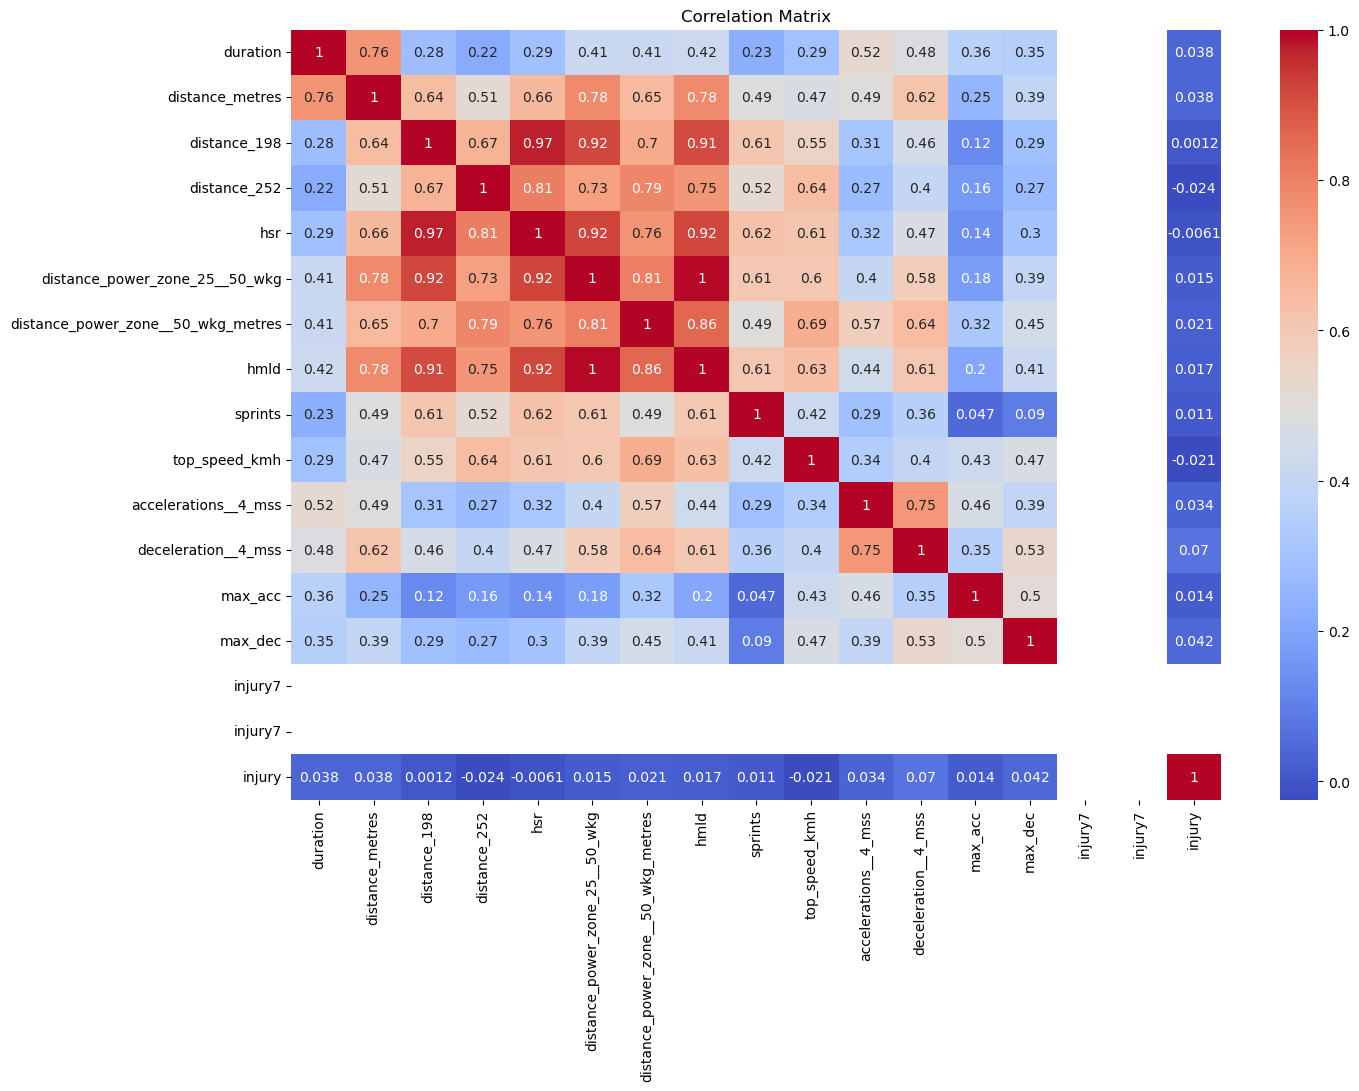

In [16]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['number'])

# Correlation matrix for numerical columns
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

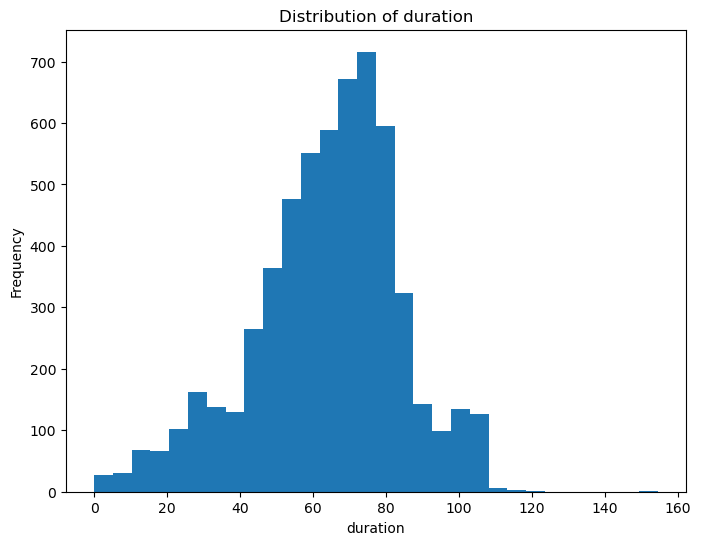

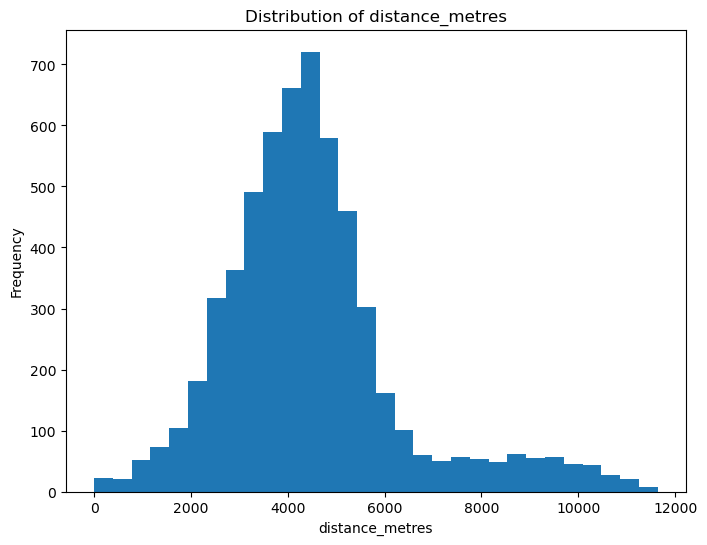

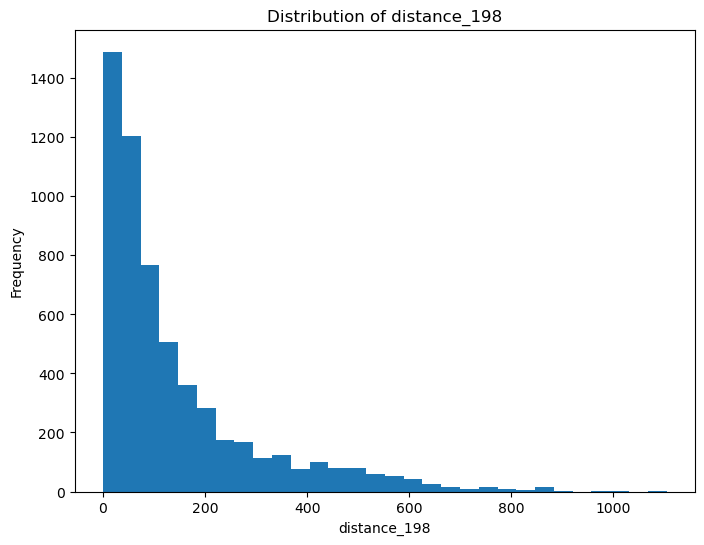

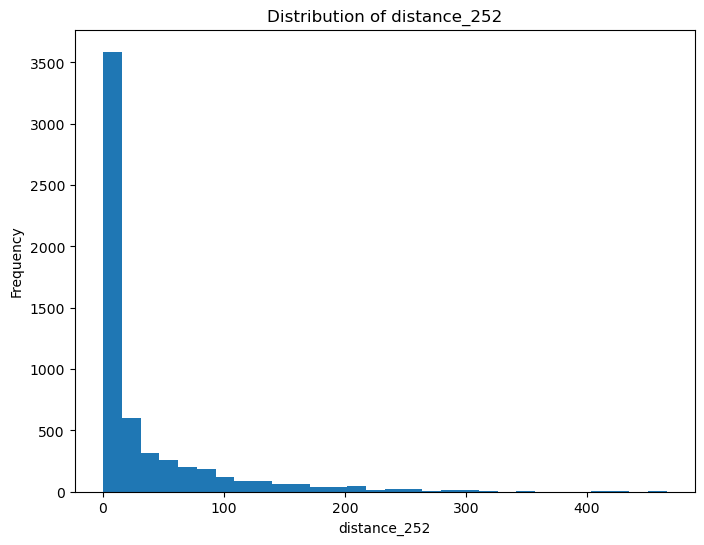

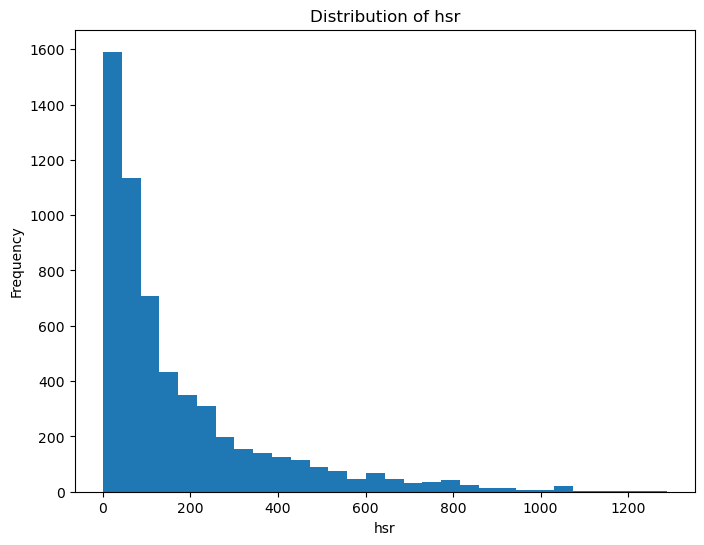

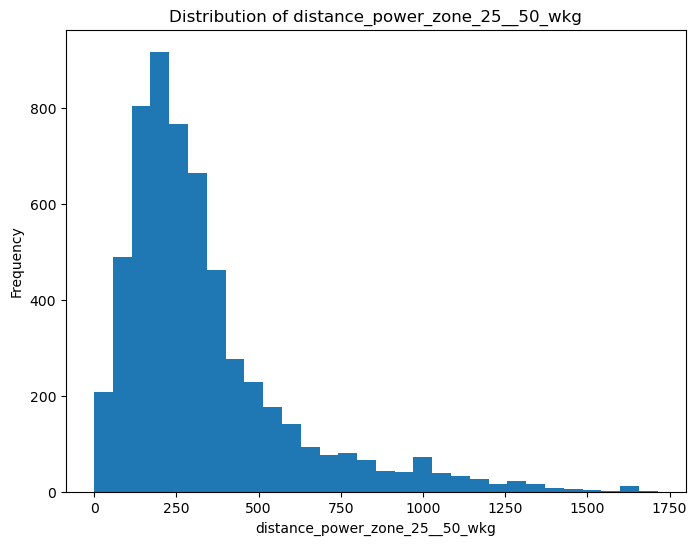

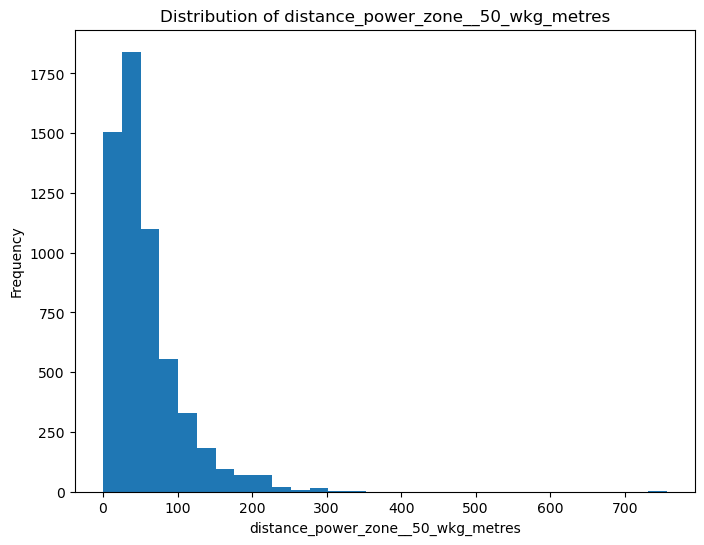

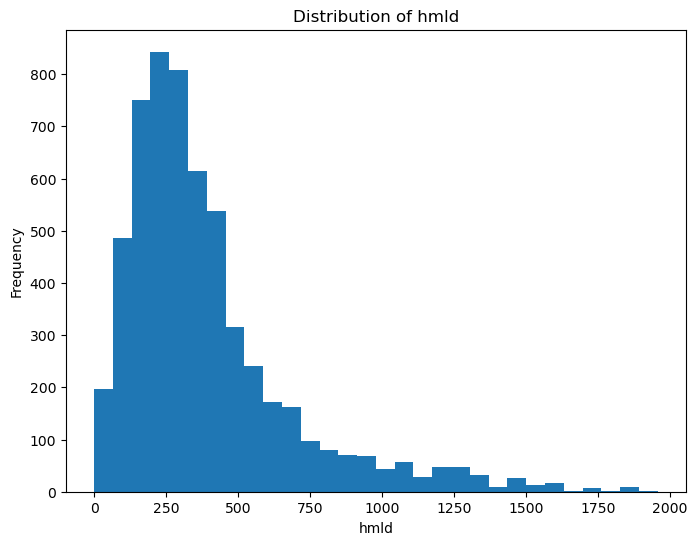

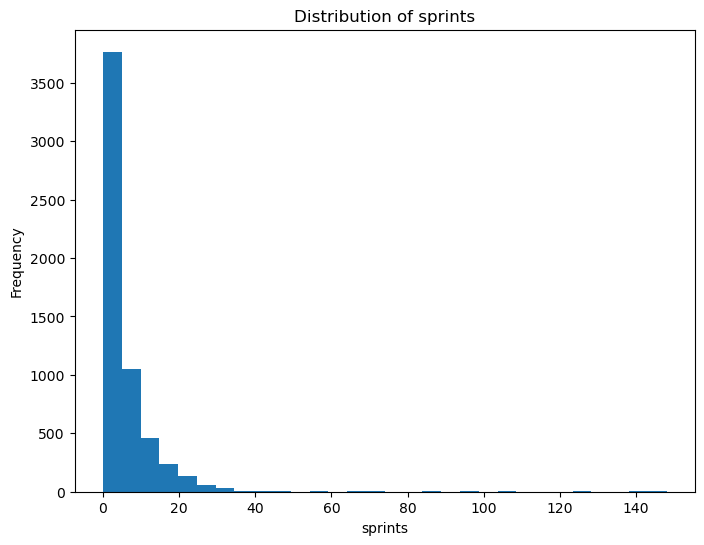

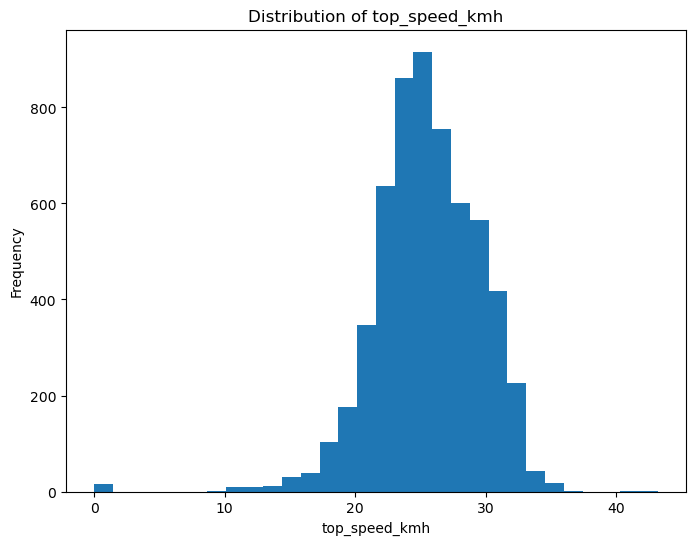

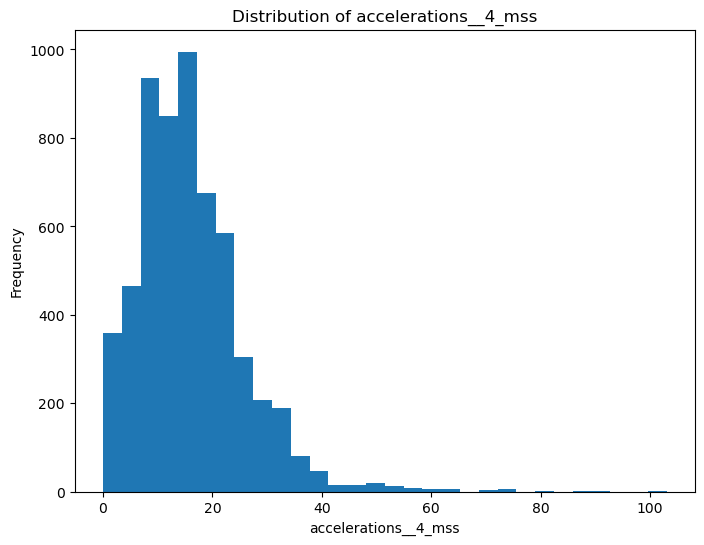

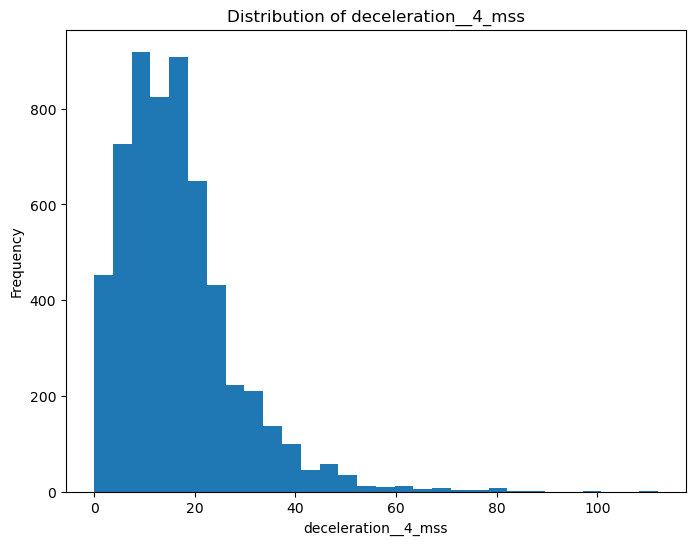

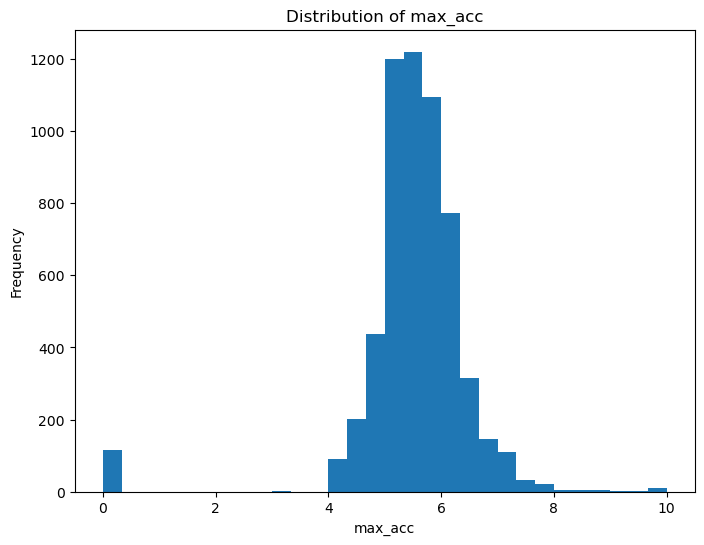

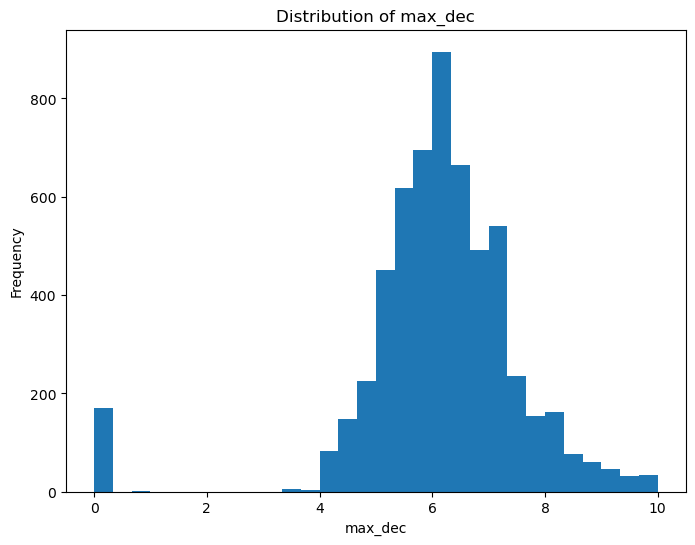

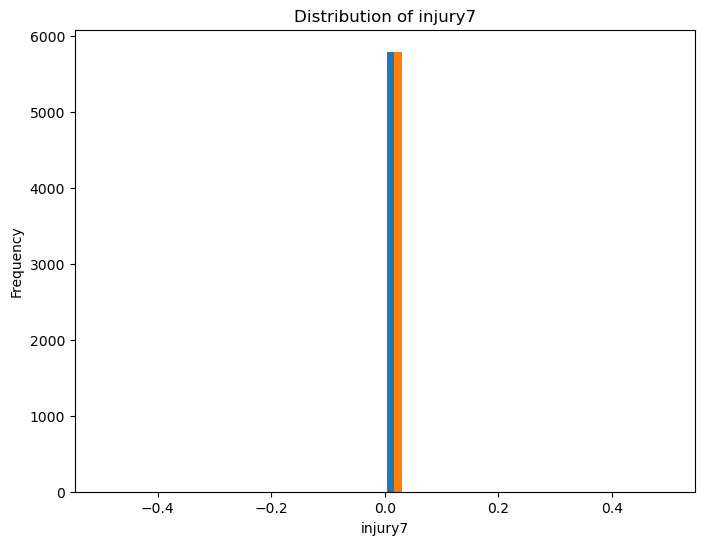

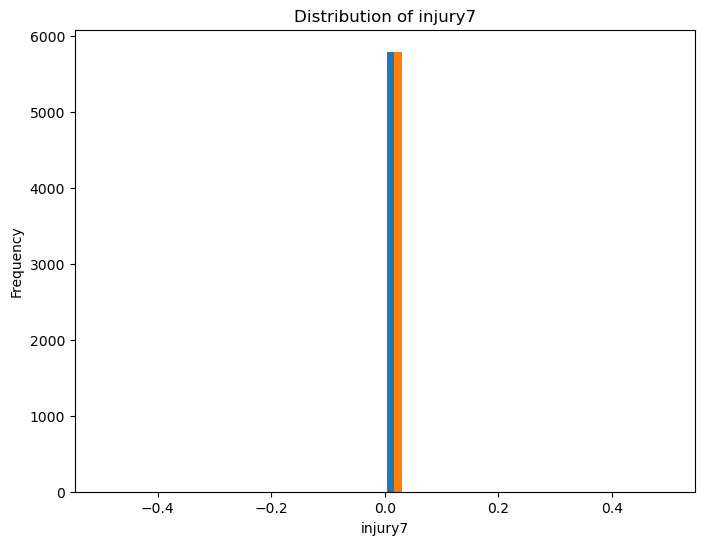

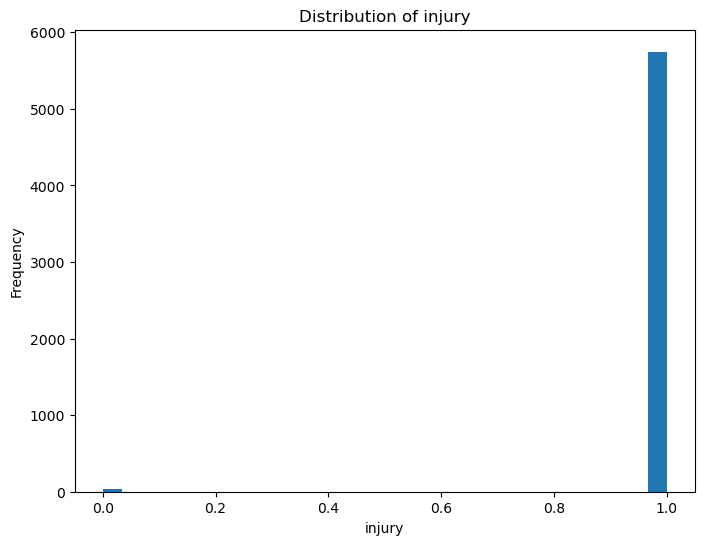

In [18]:
# Distribution of numerical variables
for column in numerical_columns.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=30)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.show()

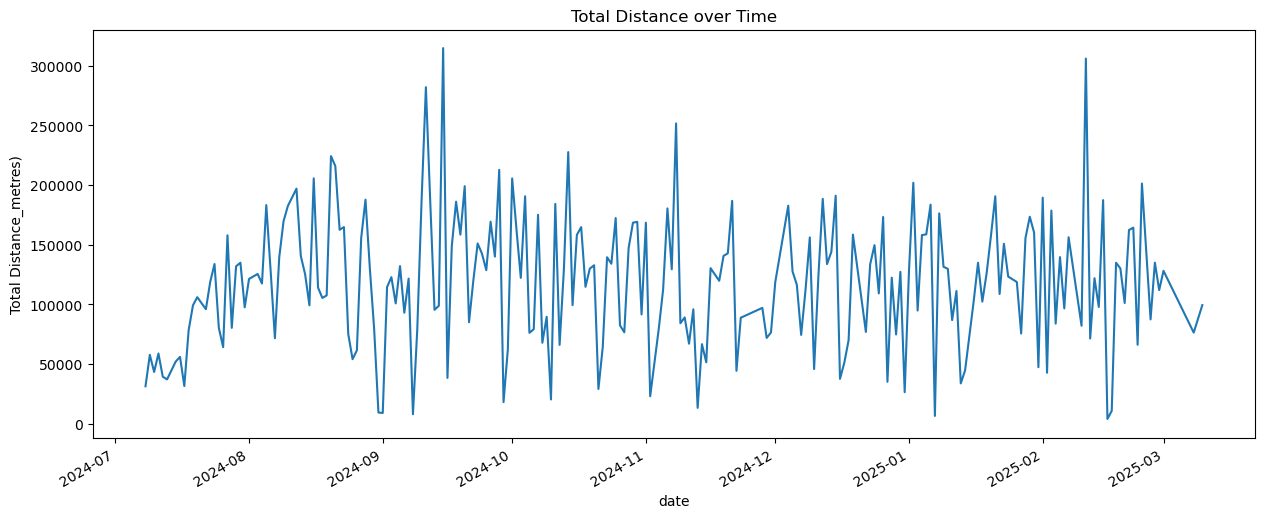

In [26]:
import matplotlib.pyplot as plt

# Time series analysis (if applicable)
plt.figure(figsize=(15, 6))
df.groupby('date')['distance_metres'].sum().plot()
plt.xlabel('date')
plt.ylabel('Total Distance_metres)')
plt.title('Total Distance over Time')
plt.show()


In [132]:
df.head()

,date,name,duration,distance_metres,distance_198,distance_252,hsr,distance_power_zone_25__50_wkg,distance_power_zone__50_wkg_metres,hmld,...,deceleration__4_mss,max_acc,max_dec,participation,notes,group,injury7,injury7,injury,position2
0,2024-07-22,Abdalla Garib,50.6,3460.0,27.0,0.0,27.0,106.0,14.0,120.0,...,2.0,4.5,7.3,OK,U23,U21,0,0,0,SD
1,2024-07-23,Abdalla Garib,62.5,4478.0,35.0,10.0,45.0,166.0,19.0,185.0,...,5.0,4.7,6.0,OK,U23,U21,0,0,0,SD
2,2024-07-24,Abdalla Garib,66.0,4239.0,34.0,7.0,41.0,197.0,38.0,235.0,...,12.0,5.0,5.8,OK,U23,U21,0,0,0,SD
3,2024-07-27,Abdalla Garib,66.0,4239.0,34.0,7.0,41.0,197.0,38.0,235.0,...,12.0,5.0,5.8,10,Absent,U21,0,0,0,SD
4,2024-07-28,Abdalla Garib,66.0,4239.0,34.0,7.0,41.0,197.0,38.0,235.0,...,12.0,5.0,5.8,1,Absent,U21,0,0,0,SD


### Cleaning 

In [53]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 date                                  0
name                                  0
duration                              0
distance_metres                       0
distance_198                          0
distance_252                          0
hsr                                   0
distance_power_zone_25__50_wkg        0
distance_power_zone__50_wkg_metres    0
hmld                                  0
sprints                               0
top_speed_kmh                         0
accelerations__4_mss                  0
deceleration__4_mss                   0
max_acc                               0
max_dec                               0
participation                         0
notes                                 3
group                                 0
injury7                               0
injury7                               0
injury                                0
position2                             0
dtype: int64


In [82]:
print(df.columns.tolist())

['date', 'name', 'duration', 'distance_metres', 'distance_198', 'distance_252', 'hsr', 'distance_power_zone_25__50_wkg', 'distance_power_zone__50_wkg_metres', 'hmld', 'sprints', 'top_speed_kmh', 'accelerations__4_mss', 'deceleration__4_mss', 'max_acc', 'max_dec', 'participation', 'notes', 'group', 'injury7', 'injury7', 'injury', 'position2']


In [84]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    display(duplicate_rows)
    # Handle duplicates (e.g., remove them)
    df.drop_duplicates(inplace=True)

# Check for inconsistencies (e.g., negative values)
for col in ['date', 'name', 'duration', 'distance_metres', 'distance_198', 'distance_252', 'hsr', 'distance_power_zone_25__50_wkg', 'distance_power_zone__50_wkg_metres', 'hmld', 'sprints', 'top_speed_kmh', 'accelerations__4_mss', 'deceleration__4_mss', 'max_acc', 'max_dec', 'participation', 'notes', 'group', 'injury7', 'injury7', 'injury', 'position2']:
    if (df[col] < 0).any():
        print(f"Negative values found in column '{col}'.")
        # Handle negative values (e.g., replace with 0 or the mean)
        df[col] = df[col].clip(lower=0)

Duplicate rows found:


,date,name,duration,distance_metres,distance_198,distance_252,hsr,distance_power_zone_25__50_wkg,distance_power_zone__50_wkg_metres,hmld,...,deceleration__4_mss,max_acc,max_dec,participation,notes,group,injury7,injury7,injury,position2
30,2024-09-03,Abdalla Garib,28.7,1886.0,63.0,211.0,274.0,231.0,105.0,337.0,...,4.0,5.9,7.2,OK,Permission,U23,0,0,0,SD
33,2024-09-04,Abdalla Garib,75.2,4920.0,155.0,20.0,174.0,376.0,54.0,431.0,...,15.0,5.2,6.6,OK,U21,U23,0,0,0,SD
70,2024-10-11,Abdalla Garib,61.0,5953.0,441.0,65.0,506.0,721.0,121.0,842.0,...,16.0,5.7,6.3,OK,U21,U23,0,0,1,SD
91,2024-11-08,Abdalla Garib,50.8,4620.0,186.0,37.0,223.0,450.0,48.0,498.0,...,11.0,5.8,5.6,OK,U21,U23,0,0,1,SD
92,2024-11-08,Abdalla Garib,50.8,4620.0,186.0,37.0,223.0,450.0,48.0,498.0,...,11.0,5.8,5.6,OK,U21,U23,0,0,1,SD
132,2025-01-09,Abdalla Garib,56.3,2909.0,31.0,1.0,33.0,134.0,30.0,164.0,...,6.0,6.0,6.1,OK,U21,U21,0,0,1,SD
153,2025-02-06,Abdalla Garib,41.6,2605.0,21.0,0.0,21.0,129.0,14.0,143.0,...,2.0,5.7,4.5,OK,no datas,U23,0,0,1,SD
330,2024-09-03,Abdelrahman Saad,29.4,2123.0,58.0,190.0,248.0,223.0,82.0,305.0,...,4.0,6.5,4.5,OK,U21,U23,0,0,1,SD
493,2024-09-03,Abdollah Hassan,29.6,1952.0,51.0,185.0,236.0,181.0,95.0,276.0,...,0.0,6.6,0.0,OK,No Datas,U23,0,0,1,SD
544,2024-11-08,Abdollah Hassan,103.3,9722.0,568.0,213.0,780.0,1157.0,175.0,1332.0,...,33.0,5.9,8.8,OK,U21,U23,0,0,1,SD


TypeError: Invalid comparison between dtype=datetime64[ns] and int

In [86]:
df = df.drop_duplicates()

In [90]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    display(duplicate_rows)
    # Handle duplicates (e.g., remove them)
    df.drop_duplicates(inplace=True)

In [102]:
df.dtypes

date                                  datetime64[ns]
name                                          object
duration                                     float64
distance_metres                              float64
distance_198                                 float64
distance_252                                 float64
hsr                                          float64
distance_power_zone_25__50_wkg               float64
distance_power_zone__50_wkg_metres           float64
hmld                                         float64
sprints                                      float64
top_speed_kmh                                float64
accelerations__4_mss                         float64
deceleration__4_mss                          float64
max_acc                                      float64
max_dec                                      float64
participation                                 object
notes                                         object
group                                         

In [104]:
print(df.columns.tolist())

['date', 'name', 'duration', 'distance_metres', 'distance_198', 'distance_252', 'hsr', 'distance_power_zone_25__50_wkg', 'distance_power_zone__50_wkg_metres', 'hmld', 'sprints', 'top_speed_kmh', 'accelerations__4_mss', 'deceleration__4_mss', 'max_acc', 'max_dec', 'participation', 'notes', 'group', 'injury7', 'injury7', 'injury', 'position2']


In [110]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['name','participation','notes','group','position2'], drop_first=True)


In [124]:
# 2. Feature Scaling
numerical_cols = df_encoded.select_dtypes(include=['number']).columns.tolist()

# Exclude one-hot encoded columns from scaling
one_hot_cols = [col for col in df_encoded.columns if col.startswith(("name", "participation", "notes", "group", "position2"))]
        
if col in numerical_cols:
        numerical_cols.remove(col)
        
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


In [130]:
# 3. Data Splitting
df_train, df_test = train_test_split(
    df_encoded, 
    test_size=0.2, 
    random_state=42, 
    stratify=df_encoded["Injury<7"]  # Ensure balanced injury distribution
)




KeyError: 'Injury<7'

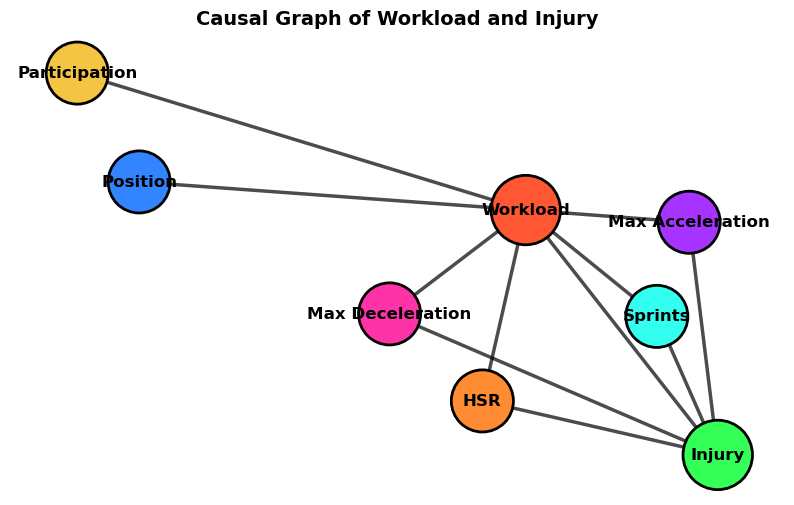

In [98]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize a directed graph
G = nx.DiGraph()

# Define nodes
nodes = {
    "Workload": {"color": "#FF5733", "size": 2500},    # Red-Orange
    "Injury": {"color": "#33FF57", "size": 2500},      # Green
    "Position": {"color": "#3385FF", "size": 2000},    # Blue
    "Participation": {"color": "#F4C542", "size": 2000}, # Yellow
    "Max Acceleration": {"color": "#A633FF", "size": 2000}, # Purple
    "Max Deceleration": {"color": "#FF33A8", "size": 2000}, # Pink
    "Sprints": {"color": "#33FFF0", "size": 2000},  # Cyan
    "HSR": {"color": "#FF8C33", "size": 2000}  # Orange
}

# Add nodes to the graph
for node, attr in nodes.items():
    G.add_node(node, **attr)

# Define edges (causal relationships)
edges = [
    ("Workload", "Injury"),
    ("Position", "Workload"),
    ("Participation", "Workload"),
    ("Max Acceleration", "Workload"),
    ("Max Deceleration", "Workload"),
    ("Sprints", "Workload"),
    ("HSR", "Workload"),
    ("Max Acceleration", "Injury"),
    ("Max Deceleration", "Injury"),
    ("Sprints", "Injury"),
    ("HSR", "Injury")
]

# Add edges to the graph
G.add_edges_from(edges)

# Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42, k=0.5)  # Layout for node positioning

# Draw nodes with custom styles
node_colors = [nodes[node]["color"] for node in G.nodes()]
node_sizes = [nodes[node]["size"] for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, edgecolors='black', linewidths=2)

# Draw edges
nx.draw_networkx_edges(G, pos, width=2.5, edge_color="black", arrows=True, alpha=0.7)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold", font_color="black")

# Show the graph
plt.title("Causal Graph of Workload and Injury", fontsize=14, fontweight="bold")
plt.axis("off")
plt.show()
